# Pneumonia Diagnosis based on Degraded Chest X-ray Images 
The author of this notebook is **Dr Raheel Siddiqi** on *10-07-2020*. He is a *Senior Assistant Professor* at Bahria University, Karachi Campus, Pakistan. His research interests include *Medical Imaging*, *Computer Vision* and *Deep Learning*.

The objective of the experiment (presented in this notebook) is to evaluate the effectiveness of **VGG16** pre-trained model when employed to diagnose Pneumonia (based on degraded Chest X-ray images). The diagnosis process comprises of classifying Chest X-ray images into one of the two classes: (a) Normal, (b) Pneumonia.

The dataset is downloded from [kaggle.com](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia). The dataset contains 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal). The images are pre-processed and gaussian noise is added to each chest X-ray image.

## Tensorflow and Keras version used

In [1]:
import tensorflow as tf
from tensorflow.python import keras

print('Tensorflow Version: ', tf.__version__)
print('Keras Version: ', keras.__version__)

Tensorflow Version:  1.13.1
Keras Version:  2.2.4-tf


## Setting up the Model

In [2]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [3]:
from tensorflow.python.keras.models import load_model

best_model = load_model('VGG16_Chest_X_Ray_Image_Classification_Pneumonia_vs_Normal_best_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [4]:
image_height = 150
image_width = 150

## Calculating Precision, Specificity and Sensitivity (Recall) values for the model
*Precision-Recall* is a useful measure of success of prediction when the classes are very imbalanced. High *precision* relates to a low false positive rate, and high *recall* relates to a low false negative rate.

Precision is defined as the number of true positives over the number of true positives plus the number of false positives. Recall is defined as the number of true positives over the number of true positives plus the number of false negatives. Please see the [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html) for details.

Another way of assessing a binary classification model is to compute the *sensitivity* (also called the true positive rate or the recall) and *specificity* (also called the true negative rate) of the model. *Sensitivity* indicates the percentage of sick people who are correctly identified as having the condition. *Specificity* indicates the percentage of healthy people who are correctly identified as not having the condition.

But first we prepare our test data, so that later we can draw the *confusion matrix* as well as calculate *precision*, *specificity* and *sensitivity (recall)* of the model.

In [5]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

normal_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\new experiments_from 24_08_2019\\Pediatric Chest X_Rays_seven_percent_Gaussian_Noise_Added\\test\\NORMAL')
pneumonia_cases_dir = Path('D:\\TensorFlow Programs\\Diagnosis of Pneumonia based on Chest X-Rays\\new experiments_from 24_08_2019\\Pediatric Chest X_Rays_seven_percent_Gaussian_Noise_Added\\test\\PNEUMONIA')

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

test_data = []
test_labels = []

for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)
                      
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (image_width,image_height))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (624, 150, 150, 3)
Total number of labels: (624, 1)


In [6]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

624/624 [==============================] - 7s 11ms/sample - loss: 1.0579 - categorical_accuracy: 0.8958
Loss on test set:  1.057940577506343
Accuracy on test set:  0.8958333


In [7]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(624,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

624/624 [==============================] - 4s 7ms/sample
(624, 1)
(624, 1)


<Figure size 432x288 with 0 Axes>

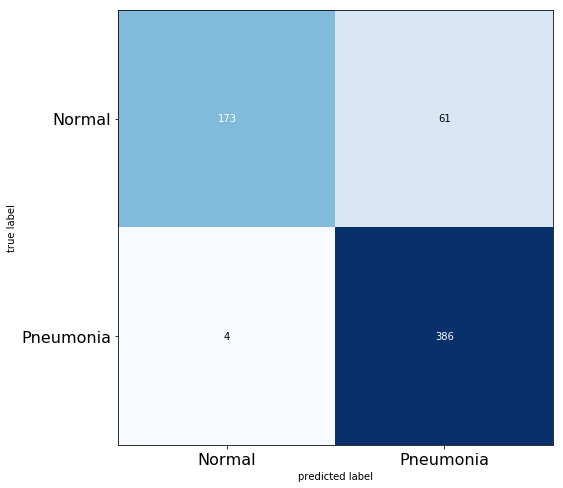

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize=16)
plt.show()

In [9]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity=tn/(tn+fp)

print("Sensitivity (Recall) of the model is {:.3f}".format(recall))
print("Specificity of the model is {:.3f}".format(specificity))
print("Precision of the model is {:.3f}".format(precision))

Sensitivity (Recall) of the model is 0.990
Specificity of the model is 0.739
Precision of the model is 0.864


Nice!!! So, this model has a `99.0%` sensitivity (recall), `73.9%` specificity and `86.4%` precision.

## ROC Curve and AUC for the model
**Receiver operating characteristic** curve (a.k.a ROC) is a graphic plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The critical point here is "binary classifier" and "varying threshold". **Area Under the Curve** (a.k.a. AUC) is the percentage of the area that is under this ROC curve, ranging between 0 and 1.
ROC is a great way to visualize the performance of a binary classifier, and AUC is one single number to summarize a classifier's performance. The higher the AUC is, the better the classifier.

In [10]:
from sklearn.metrics import roc_curve

probs = best_model.predict_proba(test_data)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), preds)

In [11]:
from sklearn.metrics import auc
auc_var = auc(fpr, tpr)

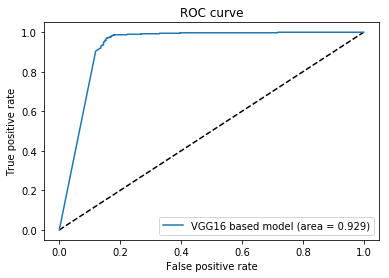

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='VGG16 based model (area = {:.3f})'.format(auc_var))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Precision-Recall Curve for the Model

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [14]:
precision, recall, thresholds = precision_recall_curve(test_labels.ravel(), preds)

In [15]:
auc_var2 = auc(recall, precision)

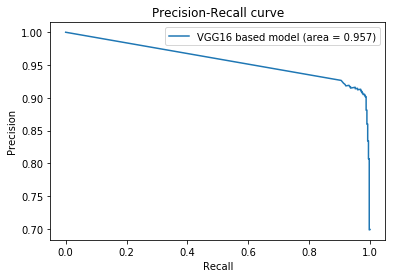

In [16]:
plt.figure()
plt.plot(recall, precision, label='VGG16 based model (area = {:.3f})'.format(auc_var2))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='best')
plt.show()

In [17]:
print('Average Precision Score: {:.3f}'.format(average_precision_score(test_labels.ravel(), preds)))

Average Precision Score: 0.924


In [18]:
print("F1 Score: {:.3f}".format(f1_score(test_labels.ravel(),predicted_labels.ravel())))

F1 Score: 0.922
